<a href="https://colab.research.google.com/github/ejrtks1020/Computer_Vision/blob/main/_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%85%B8%EC%9D%B4%EC%A6%88_%EC%A0%9C%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이미지 노이즈 제거


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### 데이터 전처리

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[... , tf.newaxis]
x_test = x_test[... , tf.newaxis]

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


### 임의의 노이즈 추가

In [ ]:
noise_factor = 0.2

x_train_noisy = x_train + noise_factor * tf.random.normal(shape = x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape = x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min = 0., clip_value_max=1.) # 픽셀값들을 0과 1사이 값으로 만듬, 1보다 크면 1, 0보다 작으면 0
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min = 0., clip_value_max=1.)

In [ ]:
x_train_noisy.shape

TensorShape([60000, 28, 28, 1])

### 노이즈가 추가된 이미지 확인

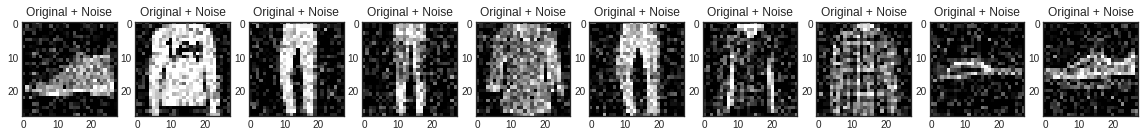

In [ ]:
n  = 10
plt.figure(figsize = (20, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.title("Original + Noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
plt.show()

### 모델 정의

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()

    self.encoder = Sequential([Input(shape = (28, 28, 1)), 
                               Conv2D(16 ,(3, 3), activation='relu', padding = 'same', strides = 2,),
                               Conv2D(8, (3, 3), activation = 'relu', padding = 'same', strides =2)])
    self.decoder = Sequential([Conv2DTranspose(8, kernel_size = 3, strides = 2, activation='relu', padding = 'same'),
                               Conv2DTranspose(16, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same'),
                               Conv2D(1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)

    return decoded

### 모델 생성 및 컴파일

In [ ]:
autoencoder = Denoise()
autoencoder.compile(optimizer = 'adam', loss = MeanSquaredError())

### 모델 학습

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs = 10,
                shuffle = True,
                validation_data = (x_test_noisy ,x_test))

Epoch 1/10
1875/1875 [==============================] - 41s 6ms/step - loss: 0.0162 - val_loss: 0.0094
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0087 - val_loss: 0.0082
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

### 인코더 요약

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


### 디코더 요약

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


### 노이즈가 있는 이미지와 없는 이미지 시각화

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

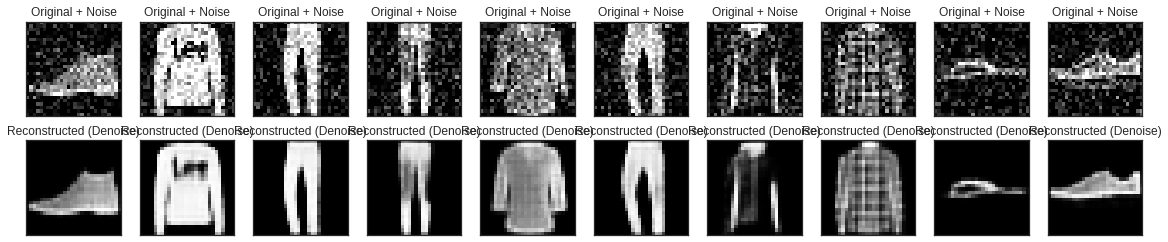

In [ ]:
n = 10
plt.figure(figsize = (20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.title("Original + Noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  bx = plt.subplot(2, n, i + 1 + n)
  plt.title("Reconstructed (Denoise)")
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.gray()
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)
